# Matplotlib {#sec-matplotlib}
![](../../figures/art_86.png){ width=40% } 

Matplotlib è una libreria di visualizzazione in Python che permette di creare una vasta gamma di figure statiche, animate e interattive. 

## Preparazione del Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
# Questa istruzione consente di visualizzare i grafici generati dai comandi di 
# plot direttamente all'interno del notebook.
%config InlineBackend.figure_format = 'retina'

# Questo valore viene usato come seed per il random number generator.
RANDOM_SEED = 42

# In questa riga, stai utilizzando il generatore di numeri casuali di NumPy per 
# creare una nuova istanza denominata rng. La funzione np.random.default_rng() viene 
# utilizzata per inizializzare un generatore di numeri casuali con un seme specifico, 
# che in questo caso è RANDOM_SEED.
rng = np.random.default_rng(RANDOM_SEED)

# Queste due righe di codice sono spesso utilizzate per personalizzare l'aspetto dei 
# grafici in Python utilizzando le librerie ArviZ e Seaborn.
# Questa riga di codice utilizza il metodo use() della libreria ArviZ per impostare uno 
# stile specifico per i tuoi grafici. In particolare, sta impostando lo stile chiamato 
# "arviz-darkgrid". Gli stili in ArviZ determinano come saranno visualizzati i grafici, inclusi colori, linee di griglia e altri dettagli estetici.
az.style.use("arviz-darkgrid")

# Questa riga di codice utilizza la libreria Seaborn per impostare il tema dei grafici. 
# In questo caso, il tema viene impostato utilizzando set_theme() con il parametro palette 
# impostato su "colorblind". Questo significa che i colori utilizzati nei grafici saranno 
# scelti in modo da essere adatti alle persone con deficit visivi dei colori, rendendo i 
# grafici più accessibili.
sns.set_theme(palette="colorblind")

## L'Interfaccia pyplot per Creare Grafici

Matplotlib è una libreria in Python famosa per la creazione di grafici, e la sua interfaccia `pyplot` è particolarmente apprezzata per la sua semplicità. Vediamo in dettaglio come funzionano le sue funzioni principali. Per comprendere meglio come funzionano le sue funzioni principali, possiamo fare un parallelo con il disegno su un supporto fisico.

- **Prepariamo la Tela**: Iniziamo con `plt.figure()`, che è analogo a ottenere una tela bianca pronta per essere dipinta. È il punto di partenza, una superficie vuota su cui creeremo il nostro grafico.

- **Definiamo le Aree di Disegno**: Successivamente, utilizzando `plt.subplot()` o `plt.axes()`, creiamo delle aree specifiche o "assi" sulla nostra tela. Questi assi corrispondono a diverse sezioni in cui posizioneremo vari elementi del nostro grafico, come se suddividessimo la tela fisica in diverse parti.

- **Aggiungiamo Elementi al Grafico**: Una volta definiti gli assi, entriamo nel processo di creazione. Usandando funzioni come `plt.plot()` per tracciare linee o `plt.scatter()` per punti, aggiungiamo elementi grafici alla nostra area di disegno. È simile a disegnare direttamente sulla tela fisica.

- **Rendiamo il Grafico Comprensibile**: Per garantire che il grafico sia chiaro e informativo, aggiungiamo etichette e titoli con `plt.xlabel()`, `plt.ylabel()` e `plt.title()`. 

## Principi Fondamentali di Pyplot

Esploriamo le funzionalità essenziali di `pyplot` di Matplotlib:

- **Creazione di Grafici Lineari**: Utilizzando `plt.plot(x, y)`, è possibile generare grafici lineari. Questa funzione necessita delle coordinate `x` e `y` per disegnare il grafico, semplificando così la rappresentazione visiva dei dati.

- **Denominazione degli Assi**: È fondamentale assegnare un'etichetta appropriata agli assi per migliorare la comprensione del grafico. Si possono denominare gli assi tramite `plt.xlabel('Nome')` per l'asse X e `plt.ylabel('Nome')` per l'asse Y, facilitando l'interpretazione dei dati visualizzati.

- **Inserimento del Titolo**: Un titolo descrittivo clarifica lo scopo o il contesto del grafico. Aggiungere un titolo è semplice con `plt.title('Titolo')`, che aiuta a comunicare il messaggio principale del grafico in modo efficace.

- **Inserimento di Legende**: Per grafici che includono più serie di dati o elementi distinti, l'aggiunta di una legenda è cruciale per la distinzione tra questi. La funzione `plt.legend()` permette di integrare una legenda, migliorando la leggibilità del grafico.

- **Esposizione del Grafico**: Una volta completata la composizione del grafico, il passo finale è la sua visualizzazione. Attraverso `plt.show()`, è possibile mostrare il grafico elaborato, offrendo una visione complessiva dei dati analizzati.

## Esempio 1: Grafico lineare semplice

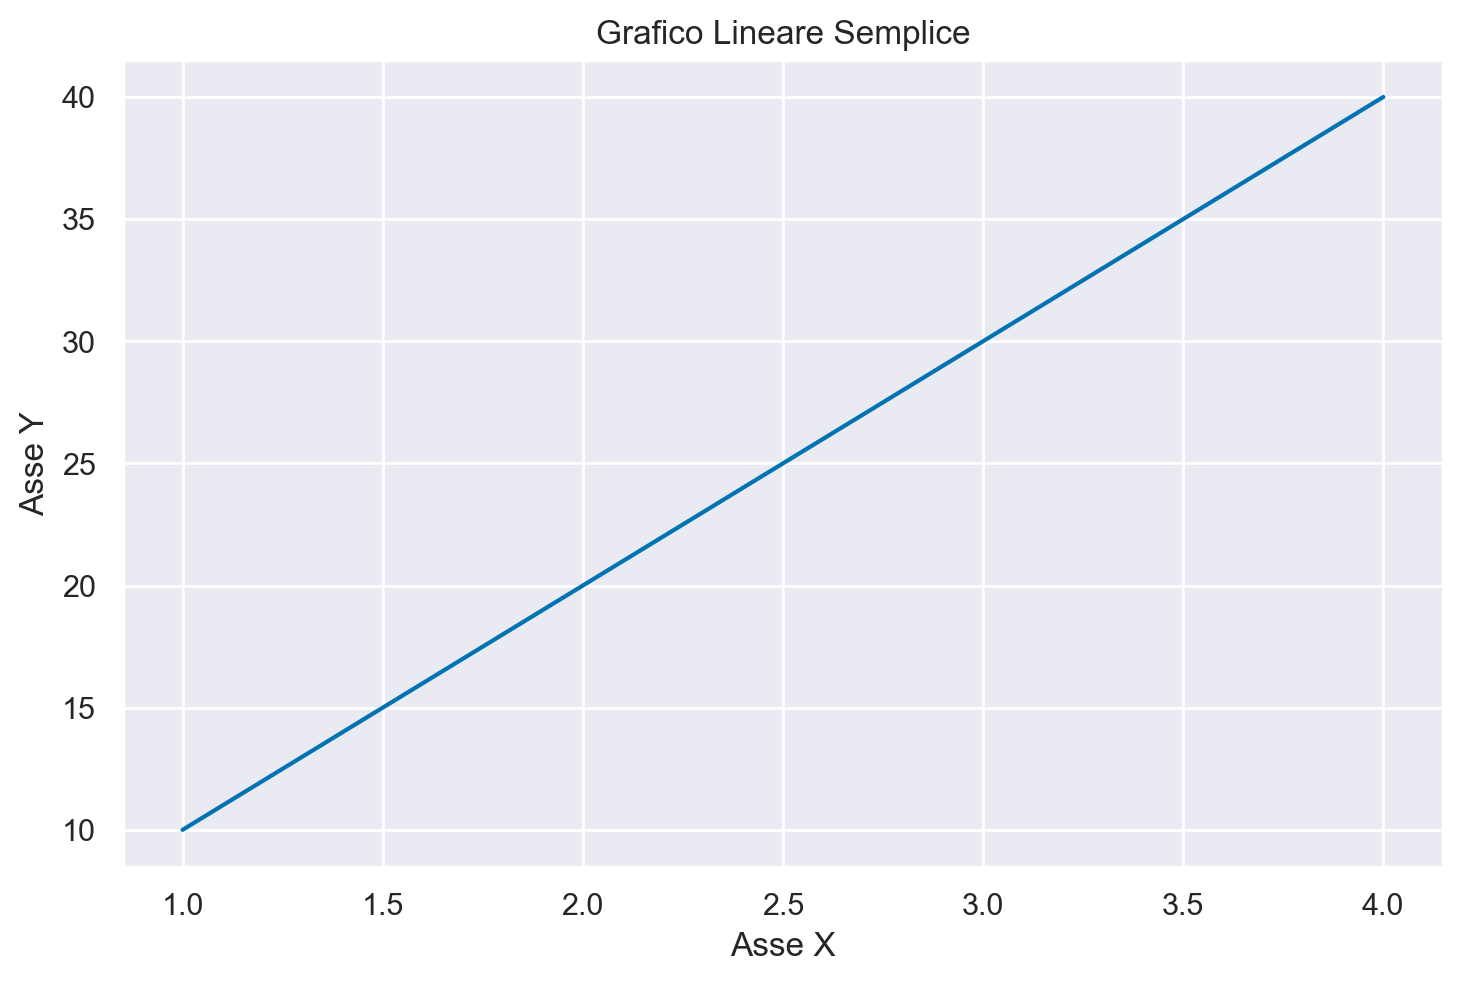

In [4]:
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

plt.plot(x, y)
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico Lineare Semplice");

## Esempio 2: Grafico con legenda e stile

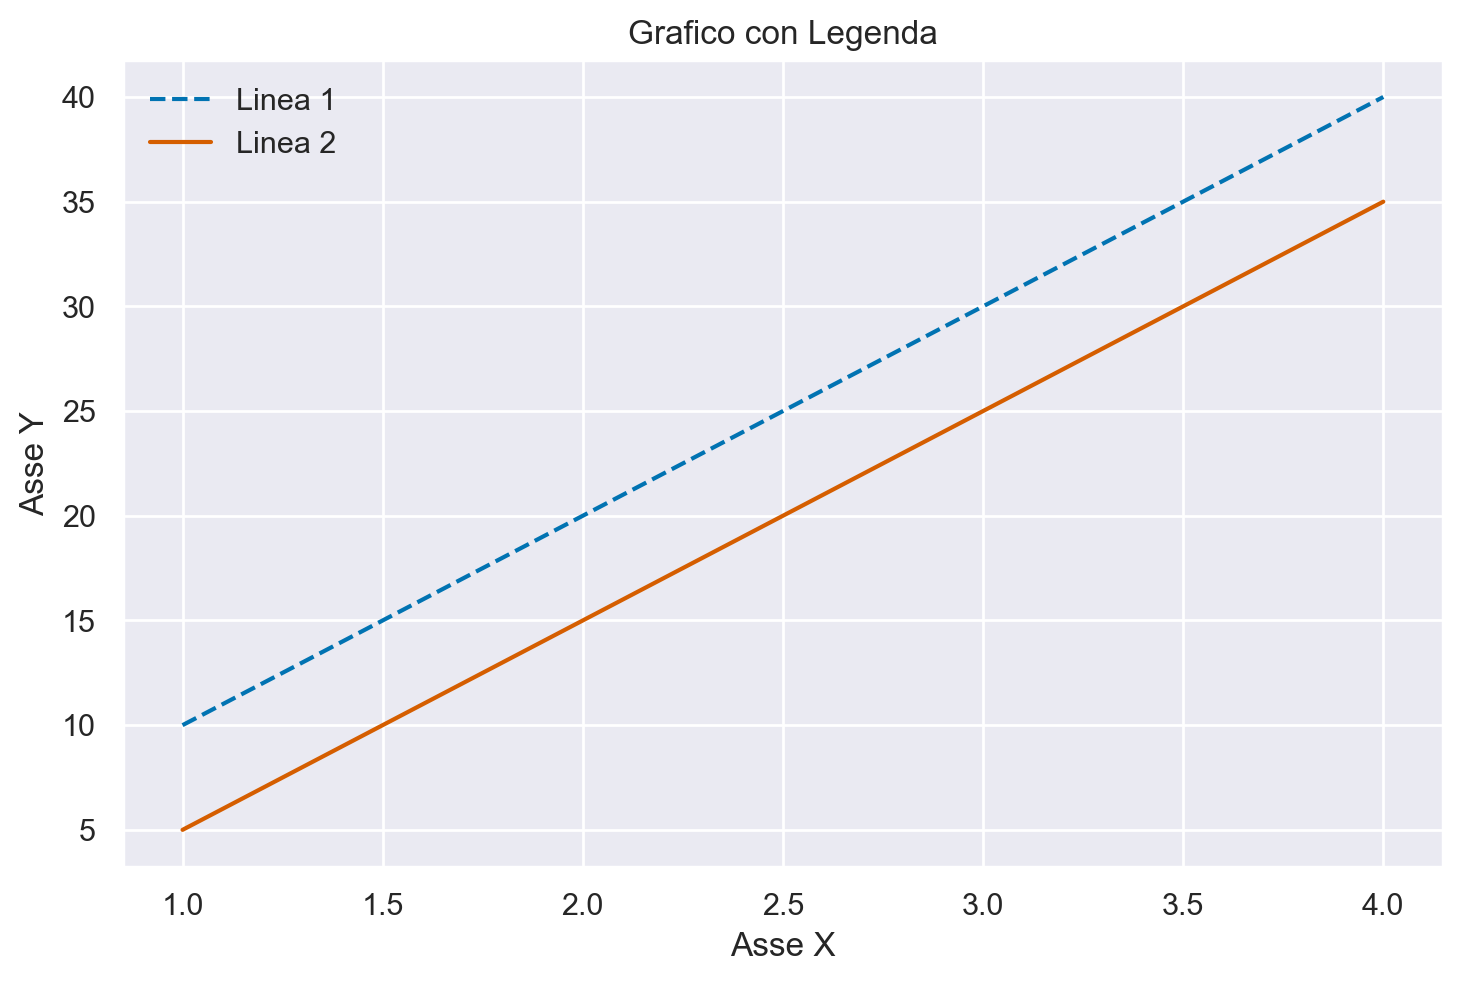

In [5]:
x = [1, 2, 3, 4]
y1 = [10, 20, 30, 40]
y2 = [5, 15, 25, 35]

plt.plot(x, y1, label="Linea 1", color="C0", linestyle="--")
plt.plot(x, y2, label="Linea 2", color="C3", linestyle="-")
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico con Legenda")
plt.legend();

## Esempio 3: Istogramma

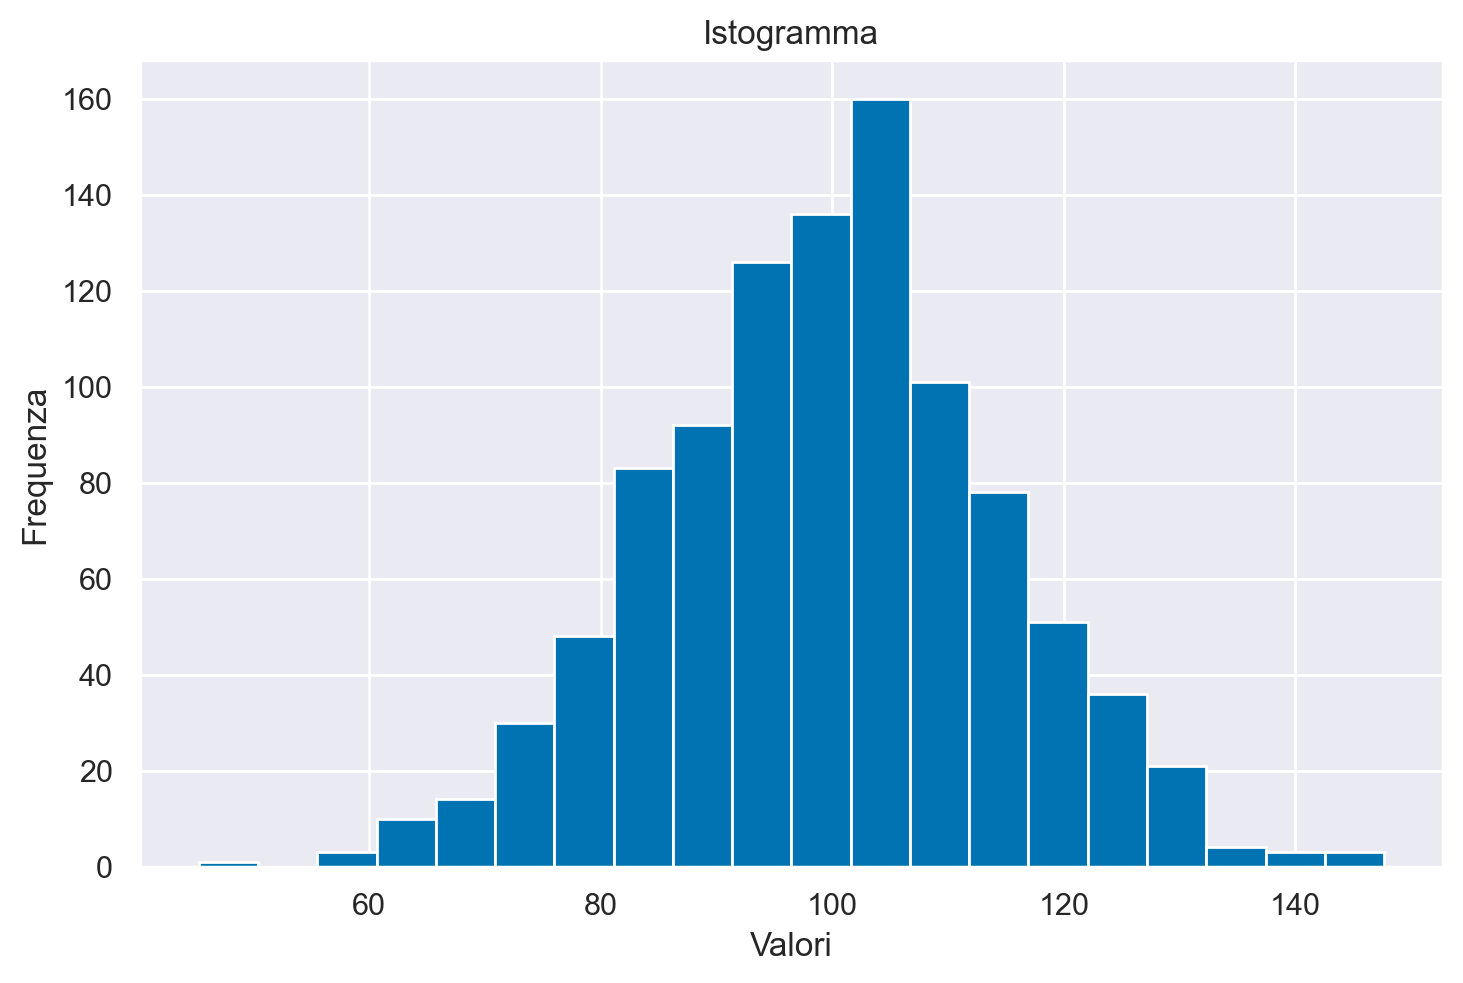

In [6]:
data = rng.normal(100, 15, 1000)

plt.hist(data, bins=20)
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.title("Istogramma");

## Esempio 4: pannelli multipli

Facciamo un altro esempio usando i dati `penguins.csv`.

In [3]:
df = pd.read_csv("../data/penguins.csv")
df.dropna(inplace=True)

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_55046/1324325854.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


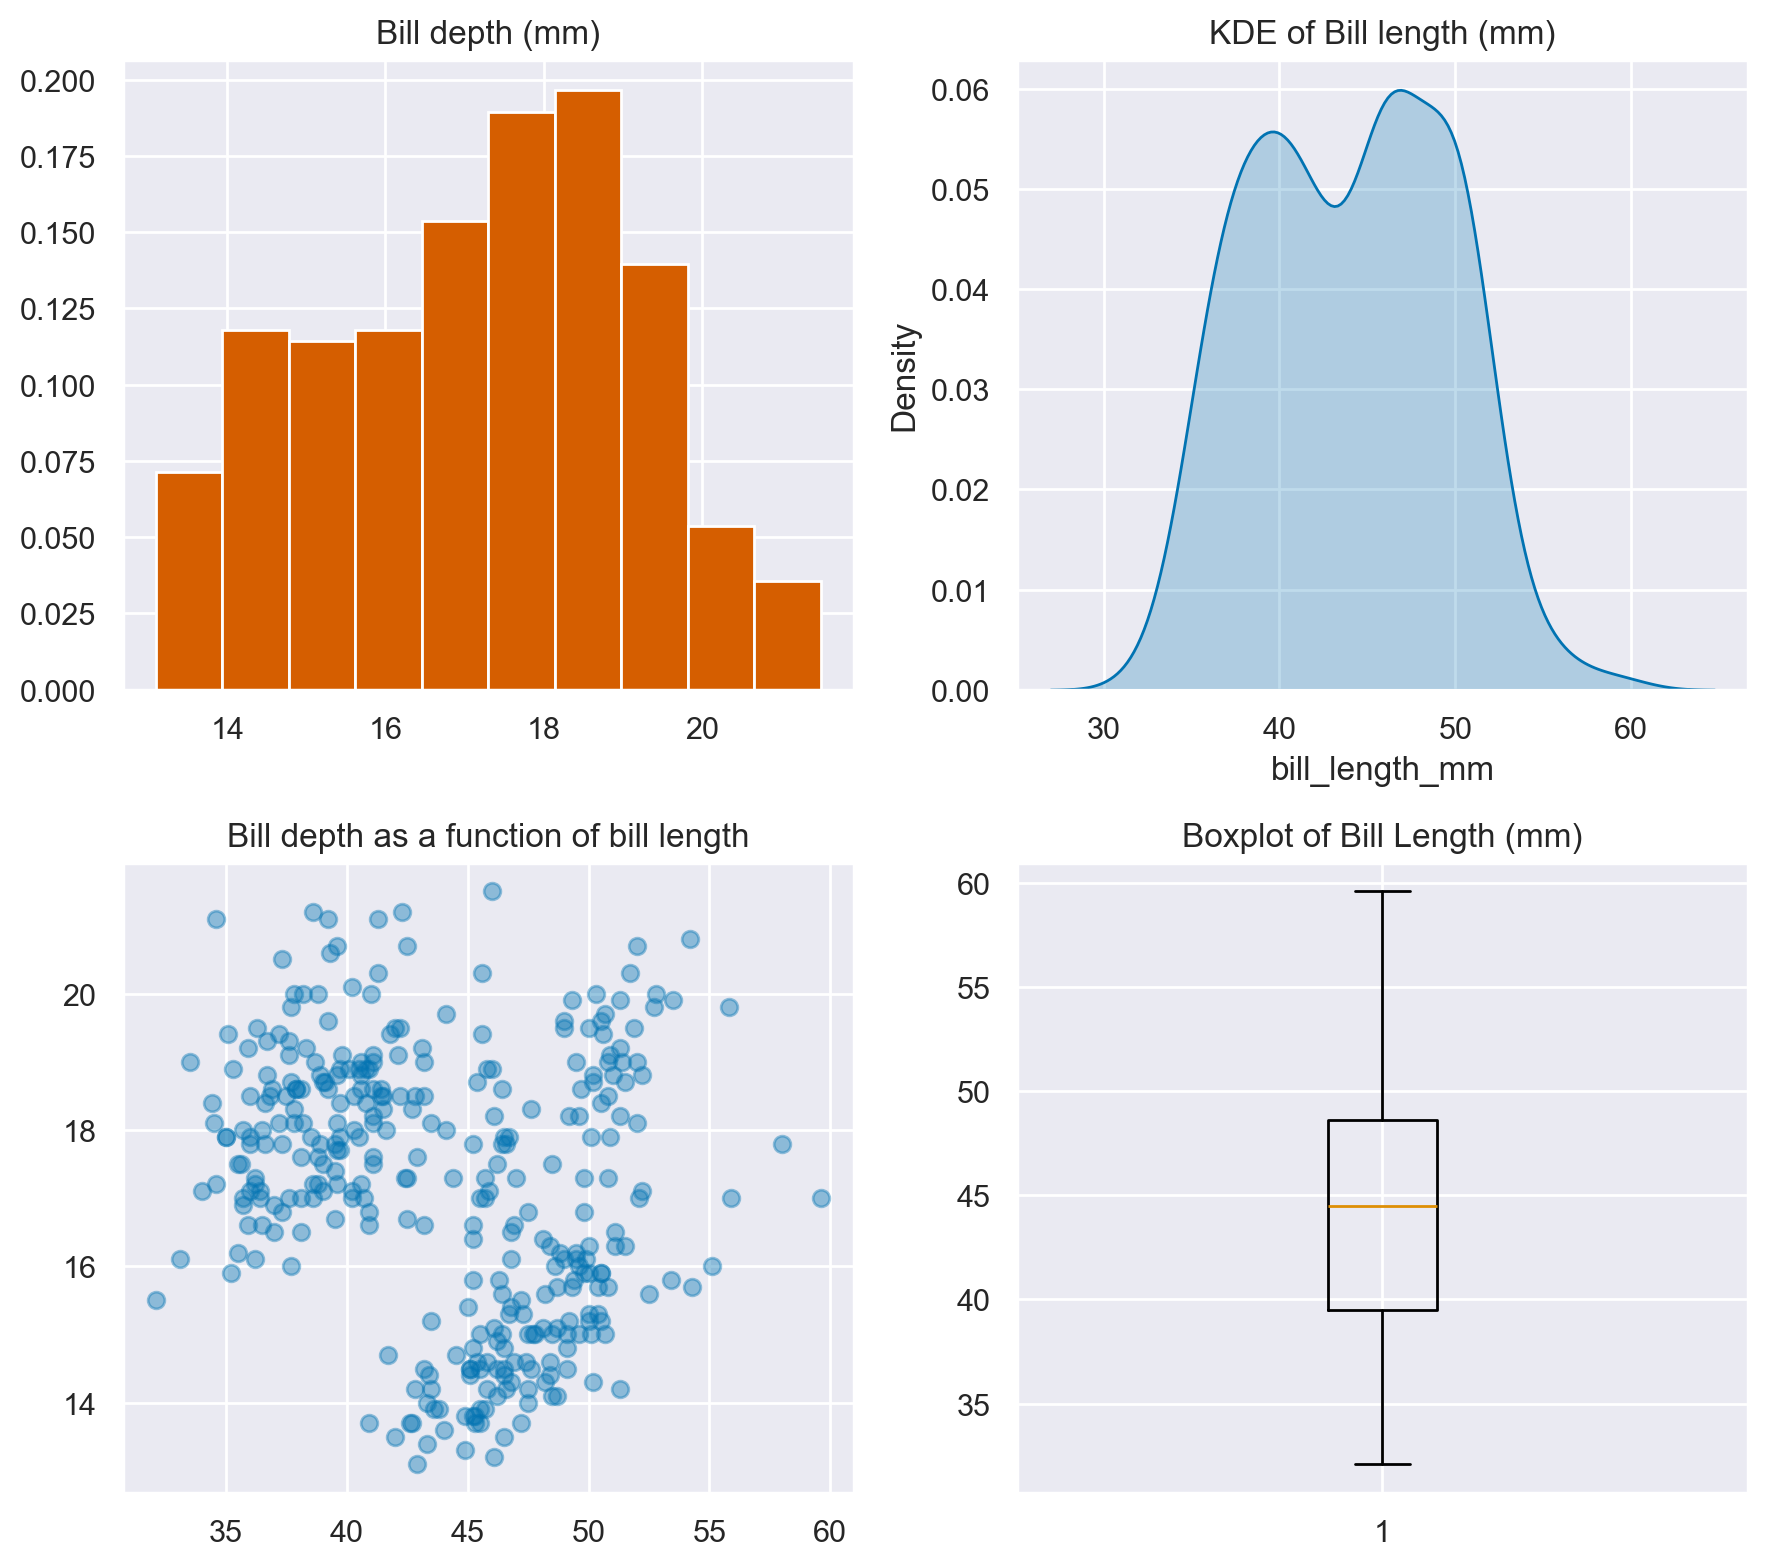

In [6]:
plt.figure(figsize=(9, 8))

plt.subplot(2, 2, 1)
plt.hist(df["bill_depth_mm"], 10, density=True, color="C3")
plt.title("Bill depth (mm)");

plt.subplot(2, 2, 2)
sns.kdeplot(df["bill_length_mm"], fill=True)
plt.title("KDE of Bill length (mm)");

plt.subplot(2, 2, 3)
plt.scatter(x=df["bill_length_mm"], y=df["bill_depth_mm"], alpha=0.4)
plt.title("Bill depth as a function of bill length");

plt.subplot(2, 2, 4)
plt.boxplot(df["bill_length_mm"])
plt.title("Boxplot of Bill Length (mm)")

plt.tight_layout()

Gli indici in `plt.subplot()` sono utilizzati per specificare come dividere una figura in diverse aree di tracciamento, chiamate "subplots". La funzione `plt.subplot(nrows, ncols, index)` prende tre argomenti principali:

- `nrows`: Numero di righe in cui la figura sarà suddivisa.
- `ncols`: Numero di colonne in cui la figura sarà suddivisa.
- `index`: Indice del subplot su cui operare, partendo dall'angolo in alto a sinistra e proseguendo da sinistra a destra e dall'alto in basso.

Nel codice precedente, `plt.subplot(2, 2, 1)` indica che la figura sarà divisa in una griglia 2x2 (2 righe e 2 colonne) e che la funzione `plt.hist()` agirà sul primo subplot, che si troverà nell'angolo in alto a sinistra.

Gli altri indici (`2`, `3`, `4`) selezionano rispettivamente il secondo subplot (in alto a destra), il terzo subplot (in basso a sinistra) e il quarto subplot (in basso a destra) della griglia 2x2.

Ecco come i subplot sono organizzati sulla figura:

```
+---------------------+----------------------+
|  plt.subplot(2,2,1) |  plt.subplot(2,2,2)  |
+---------------------+----------------------+
|  plt.subplot(2,2,3) |  plt.subplot(2,2,4)  |
+---------------------+----------------------+
```

Ogni volta che si chiama `plt.subplot()` con un nuovo indice, il "current axes" cambia per puntare al subplot specificato. Quindi, le funzioni di tracciamento come `plt.hist()`, `sns.kdeplot()`, `plt.scatter()` e `plt.boxplot()` saranno applicate al subplot attualmente selezionato.

## Informazioni sull'Ambiente di Sviluppo

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Feb 03 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.2
arviz     : 0.17.0
matplotlib: 3.8.2
pandas    : 2.1.4
seaborn   : 0.13.0

Watermark: 2.4.3

